# Exercise 1 

In this exercise, we will continue practicing `KMeans` and `SOM` using the `Mall_Customers.csv` data file. This file contains information related to a small market and includes basic data about customers, such as Customer ID, age, gender, annual income, and spending score. The spending score is assigned to each customer based on defined parameters, such as customer behavior and purchasing data. The goal of this exercise is to identify groups within the data.

### Exercise 1(a) (3 points)

Lod the below libraries.

```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom

### Exercise 1(b) (3 points)

Read the `Mall_Customers.csv` data file and create a data-frame called `df`.

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Exercise 1(c) (4 points)

Create a scatter-plot of `Annual Income (k$)` and `Spending Score (1-100)`. Describe the chart.

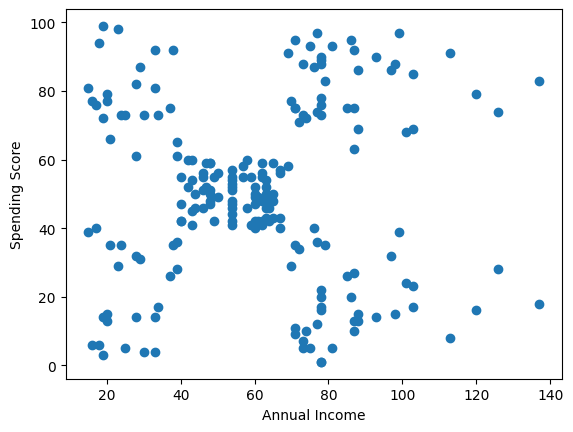

In [3]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

The above chart looks to have an X pattern with about 5 distinct groups. 

### Exercise 1(d) (4 points)

Create a DataFrame named `X` with `Annual Income (k$)` and `Spending Score (1-100)` from the DataFrame `df`. Use `StandardScaler` to standardize the columns in `X`.

In [12]:
X = pd.DataFrame(df[['Annual Income (k$)', 'Spending Score (1-100)']])
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### Exercise 1(e) (8 points)

Estimate the number of cluters, based on the standardize version of `X`, using the `inertia` and the `silhoutte` scores. How many clusters do we need for this data? Be specific.

In [13]:
# defining the list to store the innertia and sillhouette scores
inertia, silhouette = [], []

#loop over the number of clusters
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit(X)
    
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, kmeans.labels_))

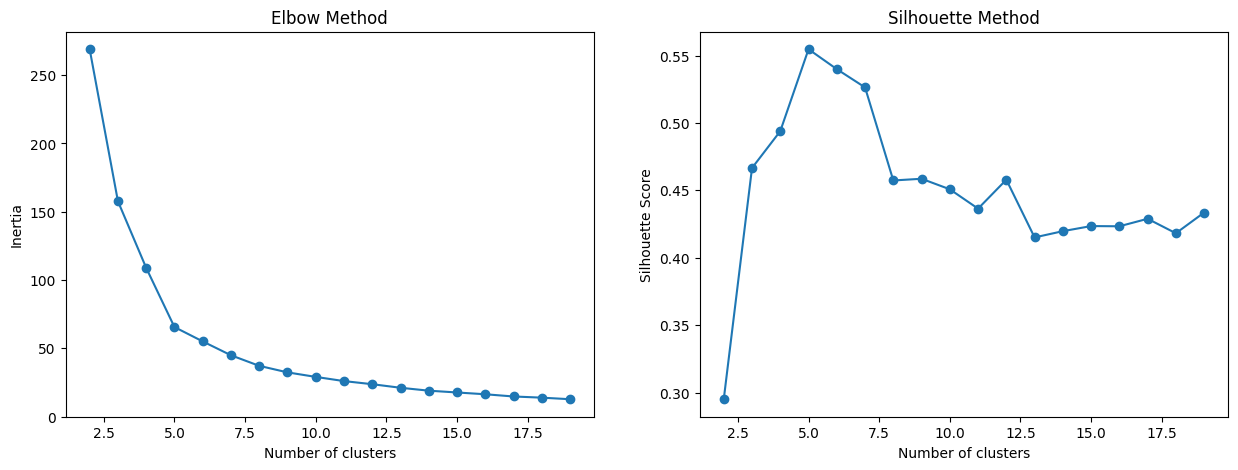

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(range(2, 20), inertia, marker='o')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Inertia')
ax[0].set_title('Elbow Method')

ax[1].plot(range(2, 20), silhouette, marker='o')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Silhouette Method')

plt.show()

From the above charts, I would choose 5 clusters because it has the highest silhouette score and is the 'elbow' of the inertia score. Also 5 is what my inital prediction was from the visualization. 

### Exercise 1(f) (5 points)

Using the results from section 1(e), apply the `KMeans` algorithm to the standardized version of `X`, and visualize the resulting clusters. Create a chart similar to the one in part 1(c), but this time, color the observations based on their cluster membership. Please provide comments on the chart. 

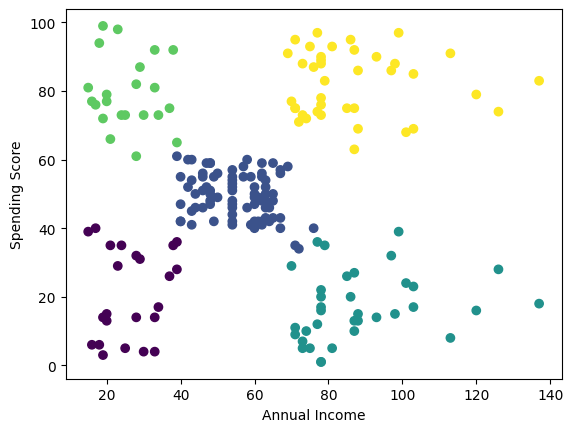

In [19]:
kmeans = KMeans(n_clusters=5, n_init=20)
kmeans.fit(X)

df['cluster'] = kmeans.labels_

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['cluster'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Exercise 1(g) (4 points)

Train the `MiniSom` model using the standardized version of `X` over a 1x5 grid for 5000 iterations with the following configuration:

```
som = MiniSom(1, 5, 2, sigma=0.5, 
              learning_rate=0.5, neighborhood_function='gaussian')
```

In [20]:
# define the SOM
som = MiniSom(1, 5, 2, sigma=0.5, learning_rate=0.5, neighborhood_function='gaussian')

# train the SOM
som.train(X, 5000, random_order=True)

### Exercise 1(h) (8 points)

Visualize the `SOM` results (see this [link as reference](https://github.com/JustGlowing/minisom/blob/master/examples/Clustering.ipynb)). Describe the chart.

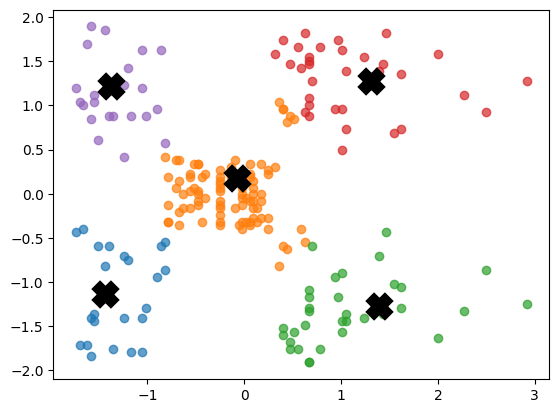

In [31]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in X]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, (1, 5))

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(X[cluster_index == c, 0],
                X[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=40, linewidths=20, color='k', label='centroid')

### Exercise 1(i) (3 points)

Do the results from part 1(h) align with the findings from part 1(f)? Be specific.

Yes, from the above chart we can see there are 5 centroids for the 5 distinctic groups. 